## SAMARTH MOTKA
## 202311023
## 28/08/23

---


## FOML-Assignment-3-Polynomial regression

## **Question 1**
>Consider the given attached datasets. You will find the only one independent variable (Income in thousand dollars) and one target variable (Card Balance in hundred dollars). Train the polynomial regression model with M = 1, 2 , 5 ,7 and 8 without using the library. and
note down the training and testing RMSEs and list them into the table. Write your observations. Also, obtain the plots of predictions upon training set and test in each cases.

Here we will be referencing ***X = Income*** and ***Y = Balance*** respectively.


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
train = pd.read_csv('/content/drive/MyDrive/polynomial regression - ass-3-foml/assign_train1.csv')
train


,Income,Balance
0,0.550798,6.397828
1,0.708148,7.623410
2,0.290905,5.356450
3,0.510828,6.396956
4,0.892947,8.778904
...,...,...
145,0.841420,8.950429
146,0.727152,7.532749
147,0.359108,4.793442
148,0.726690,9.485812


In [61]:
test = pd.read_csv('/content/drive/MyDrive/polynomial regression - ass-3-foml/assign_test.csv')
test

,Income,Balance
0,0.313819,6.344256
1,0.419583,5.372769
2,0.877212,10.001990
3,0.153740,3.854766
4,0.880125,9.595720
5,0.798964,7.485601
6,0.971624,9.611660
7,0.367703,4.929247
8,0.204940,5.154924
9,0.240570,5.318916


## Question 1

In [62]:
train_x = np.array(train["Income"])
train_y = np.array(train["Balance"])
test_x = np.array(test['Income'])
test_y = np.array(test['Balance'])



Now find all the respective values to get the value of B0, B1, B2, so on......  depending on the degree of Equation.

For degree 1 we have
u = [β1 β0]   = (AᵀA)⁻¹(AᵀY)


In [63]:

def getPowerMatrixForm(m):
  a = []
  for i in range(len(train_x)):
    var = []
    for j in reversed(range(0, m+1)):
      var.append(train_x[i]**j)
    a.append(var)
    at = np.transpose(a)

  return a,at


A1,AT1 = getPowerMatrixForm(1)
A2,AT2 = getPowerMatrixForm(2)
A5,AT5 = getPowerMatrixForm(5)
A7,AT7 = getPowerMatrixForm(7)
A8,AT8 = getPowerMatrixForm(8)


* r1 = (AᵀA)
* r1 = (AᵀA + lambda(I)) for regularization
* r2 = (AᵀY)

And finding all the values of B variables

In [64]:
def B_val(A,Aᵀ,lmb=False):
  r1 = np.dot(Aᵀ,A)
  r2 = np.dot(Aᵀ,train_y)

  r1_inv = np.linalg.inv(r1)
  b = np.dot(r1_inv,r2)
  return np.flip(b)

b1= B_val(A1,Aᵀ1)
b2= B_val(A2,Aᵀ2)
b5= B_val(A5,Aᵀ5)
b7= B_val(A7,Aᵀ7)
b8= B_val(A8,Aᵀ8)

print(b1)

[3.19142845 6.34682329]


Prediciting the values for train data

In [65]:
def Predict(test_x,b):
  predicted_y=[]
  for i in test_x:
    x=0
    for j in range(0,len(b)):
      x = x + b[j]*(i**j)
    predicted_y.append(x)

  return predicted_y

py1 = Predict(train_x,b1)
py2 = Predict(train_x,b2)
py5 = Predict(train_x,b5)
py7 = Predict(train_x,b7)
py8 = Predict(train_x,b8)


Predicting the values for test data

In [66]:

pty1 = Predict(test_x,b1)
pty2 = Predict(test_x,b2)
pty5 = Predict(test_x,b5)
pty7 = Predict(test_x,b7)
pty8 = Predict(test_x,b8)




In [67]:
def sorting(test):
  x = sorted(test)
  return x



Ploting  the actual target variable and  predicted variable for train set as well as test set.

Below plot shows the predicted values of y vs x in training and testing data for m = 1

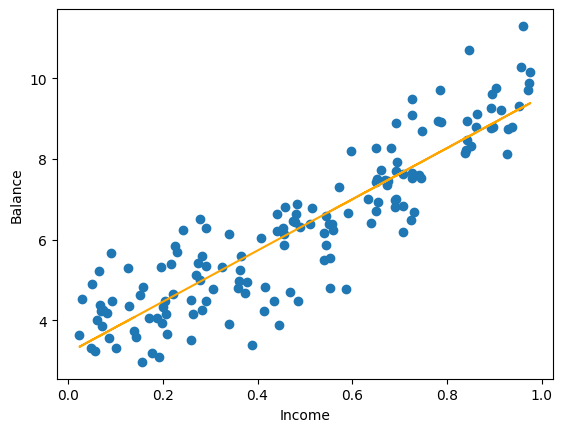

<Figure size 600x400 with 0 Axes>

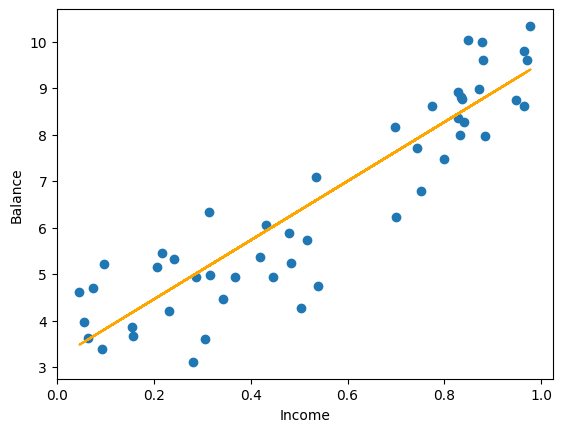

<Figure size 600x400 with 0 Axes>

In [68]:
plt.scatter(train_x,train_y)
plt.plot(train_x,py1,color='orange')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.figure(figsize=(6,4))
plt.show()

plt.scatter(test_x,test_y)
plt.plot(test_x,pty1,color='orange')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.figure(figsize=(6,4))
plt.show()

Below plot shows the predicted values of y vs x in training and testing data for m = 2

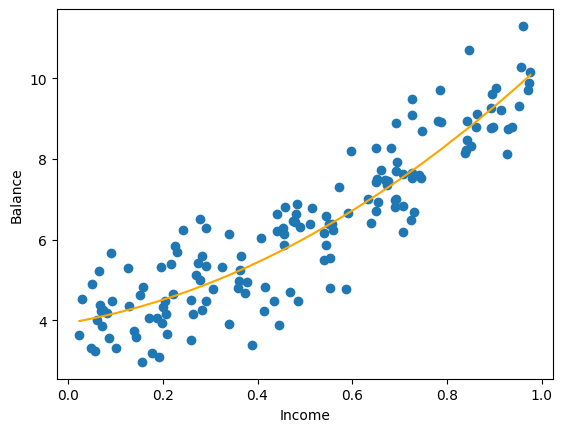

<Figure size 600x400 with 0 Axes>

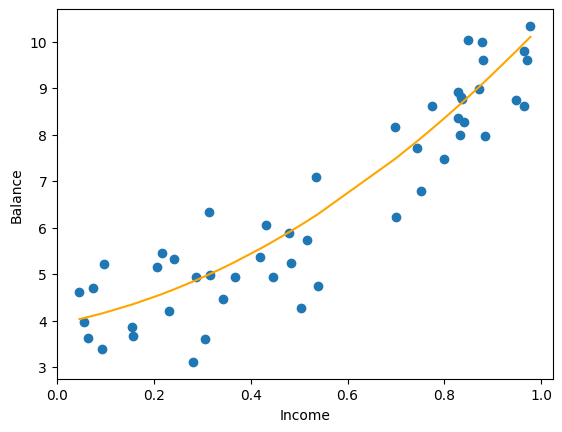

<Figure size 600x400 with 0 Axes>

In [69]:
train_x_sort = sorting(train_x)
py2_sort = sorting(py2)

test_x_sort = sorting(test_x)
pty2_sort = sorting(pty2)


plt.scatter(train_x,train_y)
plt.plot(train_x_sort,py2_sort,color='orange')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.figure(figsize=(6,4))
plt.show()

plt.scatter(test_x,test_y)
plt.plot(test_x_sort,pty2_sort,color='orange')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.figure(figsize=(6,4))
plt.show()

Below plot shows the predicted values of y vs x in training and testing data for m = 5

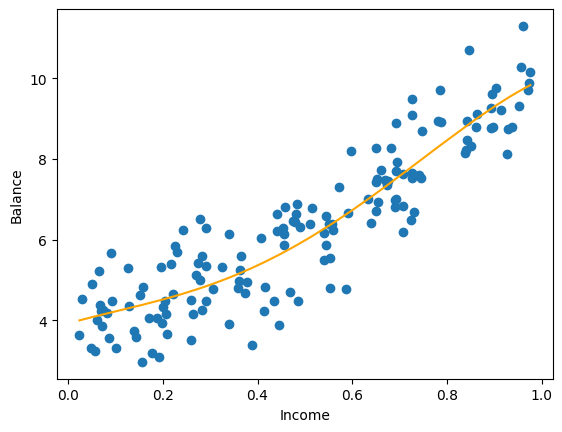

<Figure size 600x400 with 0 Axes>

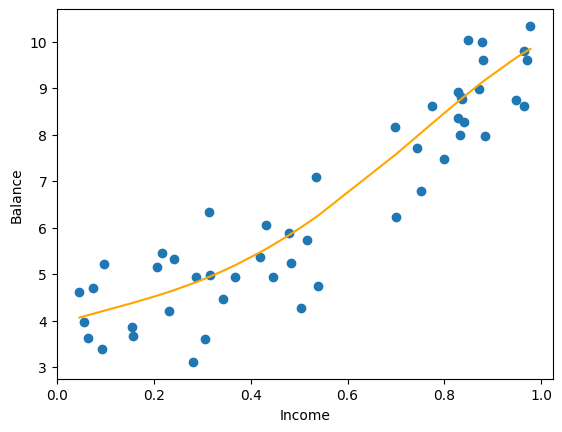

<Figure size 600x400 with 0 Axes>

In [70]:
train_x_sort = sorting(train_x)
py5_sort = sorting(py5)

test_x_sort = sorting(test_x)
pty5_sort = sorting(pty5)


plt.scatter(train_x,train_y)
plt.plot(train_x_sort,py5_sort,color='orange')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.figure(figsize=(6,4))
plt.show()

plt.scatter(test_x,test_y)
plt.plot(test_x_sort,pty5_sort,color='orange')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.figure(figsize=(6,4))
plt.show()

Below plot shows the predicted values of y vs x in training and testing data for m = 7

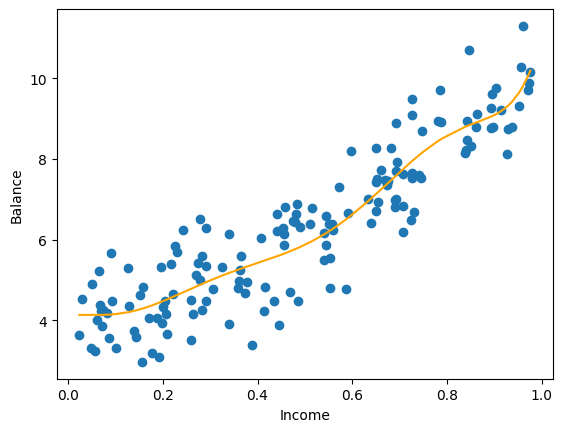

<Figure size 600x400 with 0 Axes>

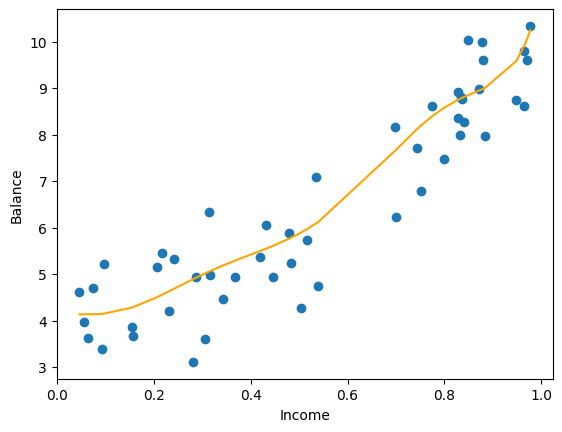

<Figure size 600x400 with 0 Axes>

In [71]:
train_x_sort = sorting(train_x)
py7_sort = sorting(py7)

test_x_sort = sorting(test_x)
pty7_sort = sorting(pty7)


plt.scatter(train_x,train_y)
plt.plot(train_x_sort,py7_sort,color='orange')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.figure(figsize=(6,4))
plt.show()

plt.scatter(test_x,test_y)
plt.plot(test_x_sort,pty7_sort,color='orange')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.figure(figsize=(6,4))
plt.show()

Below plot shows the predicted values of y vs x in training and testing data for m = 8

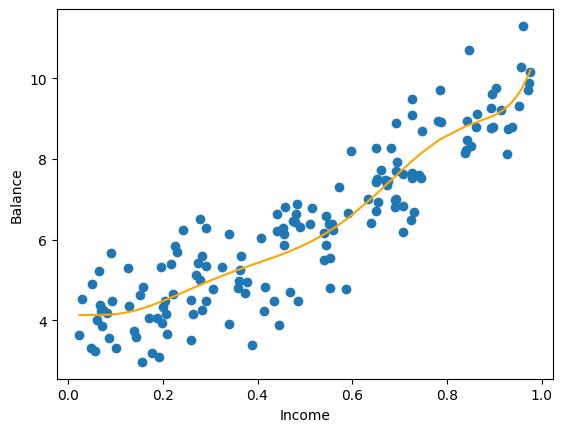

<Figure size 600x400 with 0 Axes>

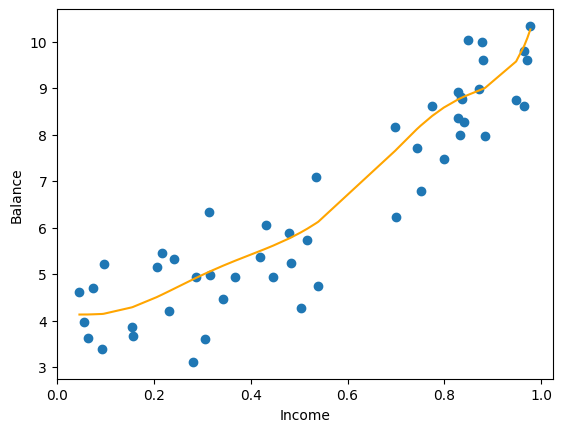

<Figure size 600x400 with 0 Axes>

In [72]:
train_x_sort = sorting(train_x)
py8_sort = sorting(py8)

test_x_sort = sorting(test_x)
pty8_sort = sorting(pty8)


plt.scatter(train_x,train_y)
plt.plot(train_x_sort,py8_sort,color='orange')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.figure(figsize=(6,4))
plt.show()

plt.scatter(test_x,test_y)
plt.plot(test_x_sort,pty8_sort,color='orange')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.figure(figsize=(6,4))
plt.show()

# RMSE(Root Man Square Error) values for train and test are given below:

RMSE value of training and testing data for M=1

In [73]:
def Rmse(predicted,original):
  RMSEtrain = 0
  for i in range(len(predicted)):
    RMSEtrain += ((predicted[i]-original[i])**2)
  RMSEtrain = (RMSEtrain/len(predicted))**0.5
  return RMSEtrain

print("Training data RMSE m=1 : ",Rmse(py1,train_y))
print("Testing data RMSE m=1 : ",Rmse(pty1,test_y))

Training data RMSE m=1 :  0.8606419012548291
Testing data RMSE m=1 :  0.8803762089235168


RMSE value of training and testing data for M=2

In [74]:
print("Training data RMSE m=2 : ",Rmse(py2,train_y))
print("Testing data RMSE m=2 : ",Rmse(pty2,test_y))

Training data RMSE m=2 :  0.8060990449397748
Testing data RMSE m=2 :  0.804343029052476


RMSE value of training and testing data for M=5

In [75]:
print("Training data RMSE m=5 : ",Rmse(py5,train_y))
print("Testing data RMSE m=5 : ",Rmse(pty5,test_y))

Training data RMSE m=5 :  0.802941526279339
Testing data RMSE m=5 :  0.793540130836137


RMSE value of training and testing data for M=7

In [76]:
print("Training data RMSE m=7 : ",Rmse(py7,train_y))
print("Testing data RMSE m=7 : ",Rmse(pty7,test_y))

Training data RMSE m=7 :  0.7959766269270383
Testing data RMSE m=7 :  0.8041895813034317


RMSE value of training and testing data for M=8

In [77]:
print("Training data RMSE m=8 : ",Rmse(py8,train_y))
print("Testing data RMSE m=8 : ",Rmse(pty8,test_y))

Training data RMSE m=8 :  0.7959639941924659
Testing data RMSE m=8 :  0.804406286677744


Creating table to compare Train and Test RMSE value for different polynomial regression values M.

In [78]:
m = [1,2,5,7,8]
train_rmse = [Rmse(py1,train_y),Rmse(py2,train_y),Rmse(py5,train_y),Rmse(py7,train_y),Rmse(py8,train_y)]
test_rmse = [Rmse(pty1,test_y),Rmse(pty2,test_y),Rmse(pty5,test_y),Rmse(pty7,test_y),Rmse(pty8,test_y)]

table = pd.DataFrame(list(zip(m, train_rmse,test_rmse)),
               columns =['M', 'Train_RMSE','Test_RMSE'])
table

,M,Train_RMSE,Test_RMSE
0,1,0.860642,0.880376
1,2,0.806099,0.804343
2,5,0.802942,0.793540
3,7,0.795977,0.804190
4,8,0.795964,0.804406


## Observations

As the complexity of the model is increased the training error has also reduced. For degree 8 polynomail the training error is least among given
and it is highest for degree 1 polynomial. But same is not the case with testing error, we can clearly see that at intial the testing error was
also reducing, it was least for degree 5 polynomial, but as we increase the complexity the testing error also increases, for degree 8 testing error is
more than degree 7. It is because when we increase the complexity the model becomes more powerfull and will try to learn everything from the dataset
which leads to overfitting, that is the reason for increase in error with increase in complexity.

## **Question 2.**
>Train the regularized polynomial regression model with M =8 (also called ridge regression) using the regularization parameter λ = 0.25 and check the training and testing RMSEs. Also, obtain the plots of predictions upon training set and test sets.

In [79]:
def B_val(A,Aᵀ,lmb=False):
  r1 = np.dot(Aᵀ,A)
  r2 = np.dot(Aᵀ,train_y)
  tm = np.shape(r1)
  I = np.identity(tm[0])
  i = np.dot(lmb,I)
  r1_inv = np.linalg.inv((r1+i))
  b = np.dot(r1_inv,r2)
  return np.flip(b)

b8= B_val(A8,Aᵀ8,0.25)


rpy8 = Predict(train_x,b8) #predicting for train data
rpty8 = Predict(test_x,b8) #predicting for test data


Below plot shows the predicted values of y vs x in training and testing data for m = 8 after regularization.


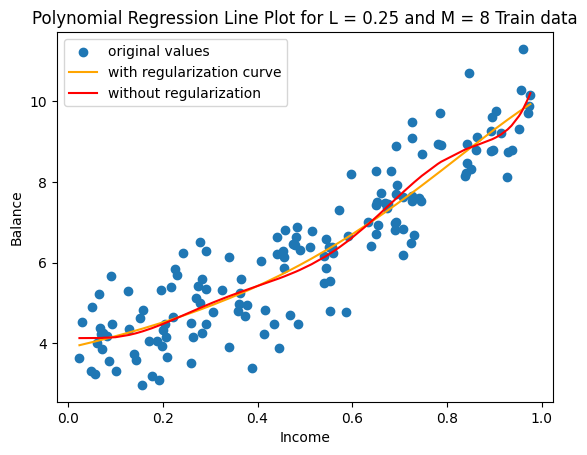

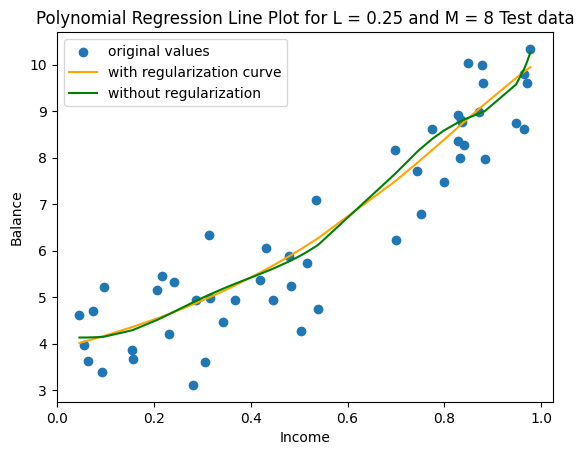

In [80]:
train_x_sort = sorting(train_x)
rpy8_sort = sorting(rpy8)

test_x_sort = sorting(test_x)
rpty8_sort = sorting(rpty8)


plt.scatter(train_x,train_y)
plt.title('Polynomial Regression Line Plot for L = 0.25 and M = 8 Train data')
plt.plot(train_x_sort,rpy8_sort,color='orange')
plt.plot(train_x_sort,py8_sort,color='red')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.legend(['original values', 'with regularization curve', 'without regularization'])
plt.show()

plt.scatter(test_x,test_y)
plt.title('Polynomial Regression Line Plot for L = 0.25 and M = 8 Test data')
plt.plot(test_x_sort,rpty8_sort,color='orange')
plt.plot(test_x_sort,pty8_sort,color='green')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.legend(['original values', 'with regularization curve', 'without regularization'])
plt.show()

RMSE value of training and testing data for M=8 after regulariztion with lambda = 0.25

In [81]:

print("Training data RMSE m=8 after regularization : ",Rmse(rpy8,train_y))
print("Testing data RMSE m=8 after regularization : ",Rmse(rpty8,test_y))

Training data RMSE m=8 after regularization :  0.8046520611013173
Testing data RMSE m=8 after regularization :  0.7969551915390599


## **Question 3.**
>Study the effect of regularization parameter λ upon the training RMSE and flexibility of the obtained curve. For λ = 0 0.25, 1, 1.5, 2 and 10, plot the
estimated function on train set.


Calculating Values of B for different lambada values

In [82]:
b18= B_val(A8,Aᵀ8,0)
b28= B_val(A8,Aᵀ8,0.25)
b38= B_val(A8,Aᵀ8,1)
b48= B_val(A8,Aᵀ8,1.5)
b58= B_val(A8,Aᵀ8,2)
b68= B_val(A8,Aᵀ8,10)


Predicting Values of training set for different lambada values

In [83]:
rpy18 = Predict(train_x,b18) #predicting for train data for 0
rpy28 = Predict(train_x,b28) #predicting for train data for 0.25
rpy38 = Predict(train_x,b38) #predicting for train data for 1
rpy48 = Predict(train_x,b48) #predicting for train data for 1.5
rpy58 = Predict(train_x,b58) #predicting for train data for 2
rpy68 = Predict(train_x,b68) #predicting for train data for 10

RMSE value of training data for different regularization parameter

In [84]:
print("RMSE value of training data for lmb = 0 : ",Rmse(rpy18,train_y))
print("RMSE value of training data for lmb = 0.25 : ",Rmse(rpy28,train_y))
print("RMSE value of training data for lmb = 1 : ",Rmse(rpy38,train_y))
print("RMSE value of training data for lmb = 1.5 : ",Rmse(rpy48,train_y))
print("RMSE value of training data for lmb = 2 : ",Rmse(rpy58,train_y))
print("RMSE value of training data for lmb = 10 : ",Rmse(rpy68,train_y))

RMSE value of training data for lmb = 0 :  0.7959639941924659
RMSE value of training data for lmb = 0.25 :  0.8046520611013173
RMSE value of training data for lmb = 1 :  0.8086090687523925
RMSE value of training data for lmb = 1.5 :  0.8114893368401226
RMSE value of training data for lmb = 2 :  0.8146045417537496
RMSE value of training data for lmb = 10 :  0.878745941264062


Below plot shows the predicted values of y vs x in training for m = 8 with regularization = 0

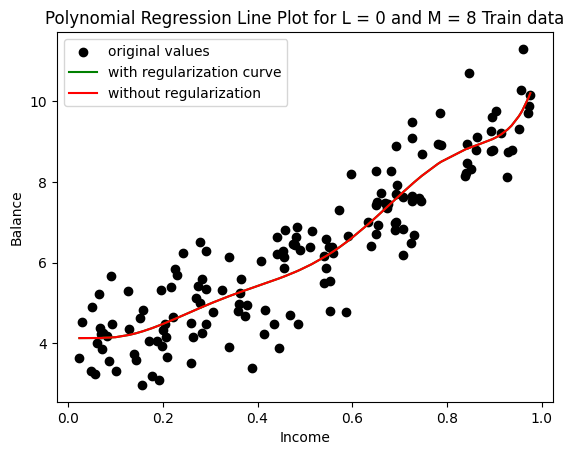

In [85]:
train_x_sort = sorting(train_x)
rpy18_sort = sorting(rpy18)

plt.scatter(train_x,train_y,color='black')
plt.title('Polynomial Regression Line Plot for L = 0 and M = 8 Train data')
plt.plot(train_x_sort,rpy18_sort,color='green')
plt.plot(train_x_sort,py8_sort,color='red')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.legend(['original values', 'with regularization curve', 'without regularization'])
plt.show()

Below plot shows the predicted values of y vs x in training for m = 8 with regularization = 0.25

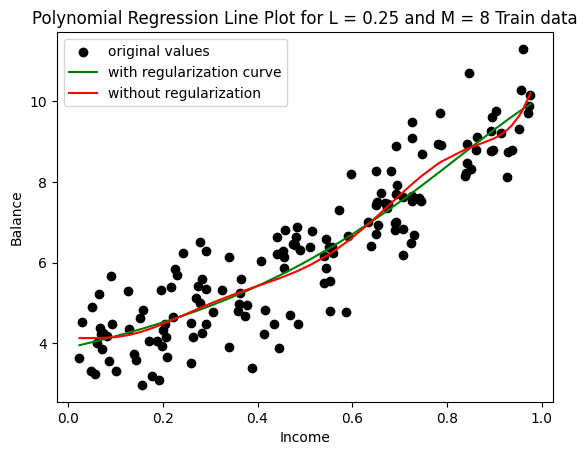

In [86]:
train_x_sort = sorting(train_x)
rpy28_sort = sorting(rpy28)

plt.scatter(train_x,train_y,color='black')
plt.title('Polynomial Regression Line Plot for L = 0.25 and M = 8 Train data')
plt.plot(train_x_sort,rpy28_sort,color='green')
plt.plot(train_x_sort,py8_sort,color='red')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.legend(['original values', 'with regularization curve', 'without regularization'])
plt.show()

Below plot shows the predicted values of y vs x in training for m = 8 with regularization = 1

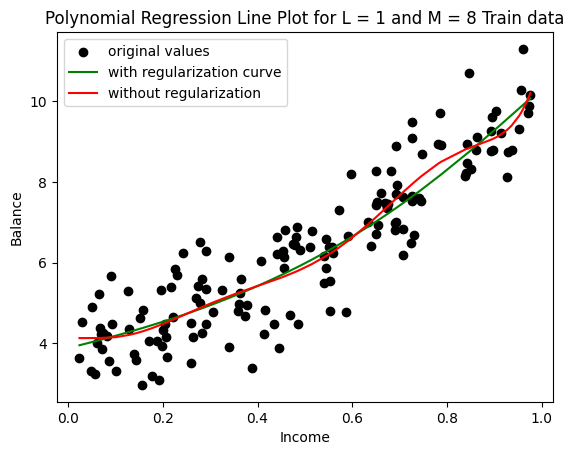

In [87]:
train_x_sort = sorting(train_x)
rpy38_sort = sorting(rpy38)

plt.scatter(train_x,train_y,color='black')
plt.title('Polynomial Regression Line Plot for L = 1 and M = 8 Train data')
plt.plot(train_x_sort,rpy38_sort,color='green')
plt.plot(train_x_sort,py8_sort,color='red')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.legend(['original values', 'with regularization curve', 'without regularization'])
plt.show()

Below plot shows the predicted values of y vs x in training for m = 8 with regularization = 1.5

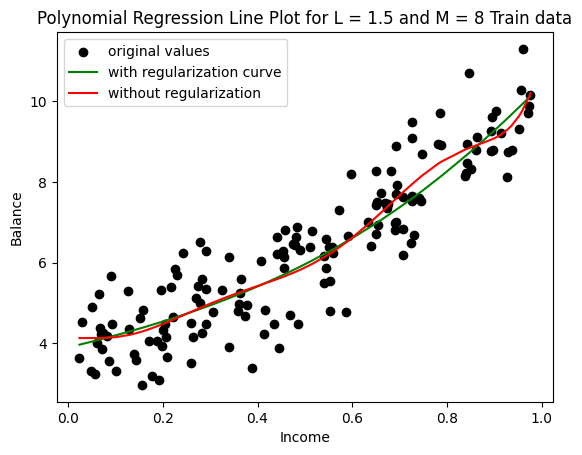

In [88]:
train_x_sort = sorting(train_x)
rpy48_sort = sorting(rpy48)

plt.scatter(train_x,train_y,color='black')
plt.title('Polynomial Regression Line Plot for L = 1.5 and M = 8 Train data')
plt.plot(train_x_sort,rpy48_sort,color='green')
plt.plot(train_x_sort,py8_sort,color='red')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.legend(['original values', 'with regularization curve', 'without regularization'])
plt.show()

Below plot shows the predicted values of y vs x in training for m = 8 with regularization = 2

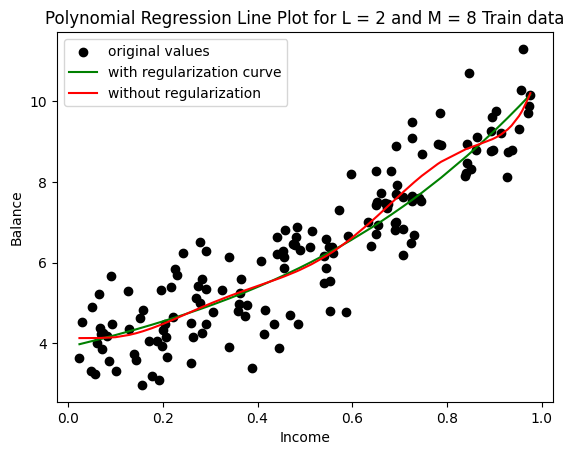

In [89]:
train_x_sort = sorting(train_x)
rpy58_sort = sorting(rpy58)

plt.scatter(train_x,train_y,color='black')
plt.title('Polynomial Regression Line Plot for L = 2 and M = 8 Train data')
plt.plot(train_x_sort,rpy58_sort,color='green')
plt.plot(train_x_sort,py8_sort,color='red')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.legend(['original values', 'with regularization curve', 'without regularization'])
plt.show()

Below plot shows the predicted values of y vs x in training for m = 8 with regularization = 10

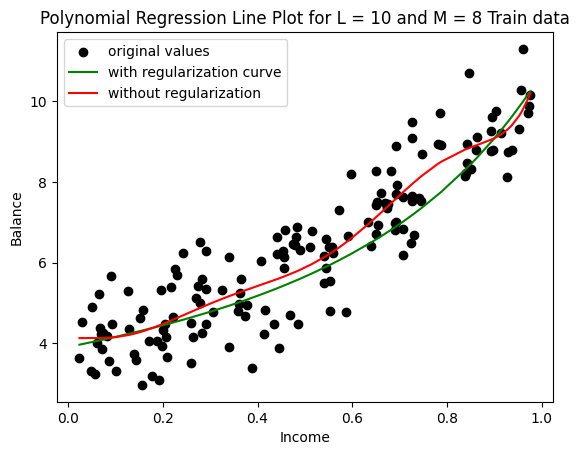

In [90]:
train_x_sort = sorting(train_x)
rpy68_sort = sorting(rpy68)

plt.scatter(train_x,train_y,color='black')
plt.title('Polynomial Regression Line Plot for L = 10 and M = 8 Train data')
plt.plot(train_x_sort,rpy68_sort,color='green')
plt.plot(train_x_sort,py8_sort,color='red')
plt.xlabel("Income")
plt.ylabel("Balance")
plt.legend(['original values', 'with regularization curve', 'without regularization'])
plt.show()

## **Question 4.**
>Write down all of your observations and inference you have obtained from your experiments.

---

> From the above errors table, which includes training and testing errors for different polynomial degrees (M), we can make several observations are as follow:

1. **Polynomial Degree with Training Error**:

    As the polynomial degree (M) increases from 1 to 8, the training error generally decreases. This is expected because higher-degree polynomials can fit the training data more closely and tend to result in lower training errors.We can see that with M='8' we have least RMSE values of all.

2. **Polynomial Degree with Testing Error**:

    The testing error shows a more complex pattern as the polynomial degree increases. Initially, the testing error decreases from M=1 to M=2, suggesting that a polynomial of degree 2 may provide a better balance between fitting the training data and generalizing to unseen data compared to M=1. We can find the least RMSE values with M='5'. However, beyond M=5, the testing error starts to increase, indicating overfitting. which is not true for training data.

3. **Best Polynomial Degree**:

    Based on the provided errors, it appears that a polynomial of degree 5 (M=5) results in the lowest testing error, which is a good choice for this dataset.

    Polynomial degrees higher than 2 (e.g. M=7, M=8) lead to overfitting and increased testing errors. These models perform well on the training data but fail to generalize to new data.

4. **Regularization**:

    To mitigate overfitting for higher-degree polynomials, we have considered the regularization techniques (e.g., L1 or L2 regularization) to the model, which can help control the model's complexity and improve generalization.

